In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing bootstrap samples

In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

### Instructions
    - Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.
    - Use np.random.choice() to generate a bootstrap sample from the NumPy array rainfall. Be sure that the size of the resampled array is len(rainfall).
    - Use the function ecdf() that you wrote in the prequel to this course to generate the x and y values for the ECDF of the bootstrap sample bs_sample.
    - Plot the ECDF values. Specify color='gray' (to make gray dots) and alpha=0.1 (to make them semi-transparent, since we are overlaying so many) in addition to the marker='.' and linestyle='none' keyword arguments.
    - Use ecdf() to generate x and y values for the ECDF of the original rainfall data available in the array rainfall.
    - Plot the ECDF values of the original data.
    - Hit submit to visualize the samples!

In [9]:
df = pd.read_csv('../../data/sheffield_weather_station.csv', 
                 skiprows=8, 
                 delimiter=' ', 
                 skipinitialspace=True)
rainfall = df["rain"].values

def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

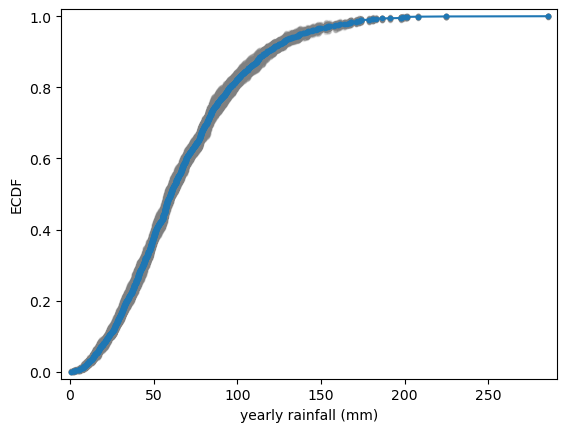

In [10]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

### Generating many bootstrap replicates

The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

For your reference, the bootstrap_replicate_1d() function is provided below:

<code>
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
</code>

### Instructions
    - Define a function with call signature draw_bs_reps(data, func, size=1).
    - Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap replicates.
    - Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the replicate in the appropriate index of bs_replicates.
    - Return the array of replicates bs_replicates. This has already been done for you.

In [11]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [12]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

### Bootstrap replicates of the mean and the SEM

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called rainfall.

### Instructions
    - Draw 10000 bootstrap replicates of the mean annual rainfall using your draw_bs_reps() function and the rainfall array. Hint: Pass in np.mean for func to compute the mean.
    -     As a reminder, draw_bs_reps() accepts 3 arguments: data, func, and size.
    - Compute and print the standard error of the mean of rainfall.
    -     The formula to compute this is np.std(data) / np.sqrt(len(data)).
    - Compute and print the standard deviation of your bootstrap replicates bs_replicates.
    - Make a histogram of the replicates using the normed=True keyword argument and 50 bins.
    - Hit submit to see the plot!

0.9488593574676786
0.9489499269195045


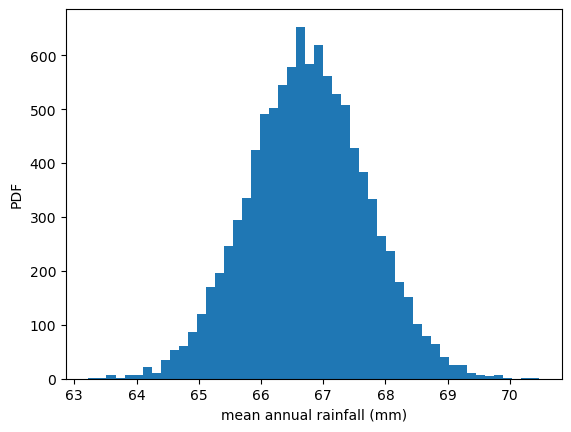

In [14]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
#_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Bootstrap replicates of other statistics

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the draw_bs_reps() function you defined a few exercises ago. It is provided below for your reference:

<code>
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates
</code>

### Instructions
    - Draw 10000 bootstrap replicates of the variance in annual rainfall, stored in the rainfall dataset, using your draw_bs_reps() function. Hint: Pass in np.var for computing the variance.
    - Divide your variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.
    - Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.

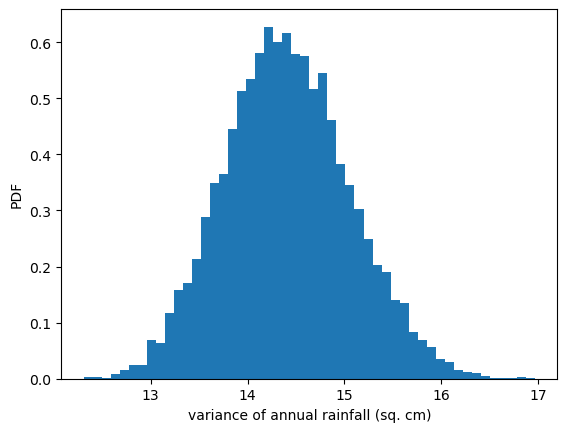

In [17]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
#_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Confidence interval on the rate of no-hitters

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter t. Plot a histogram of your replicates and report a 95% confidence interval.

### Instructions
    - Generate 10000 bootstrap replicates of tfrom the nohitter_times data using your draw_bs_reps() function. Recall that the optimal t is calculated as the mean of the data.
    - Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
    - Print the confidence interval.
    - Plot a histogram of your bootstrap replicates. This has been done for you, so hit submit to see the plot!

In [21]:
df = pd.read_csv('../../data/mlb_nohitters.csv')
nohitter_times = df['game_number'].values

95% confidence interval = [ 89220.43945578 103920.51573129] games


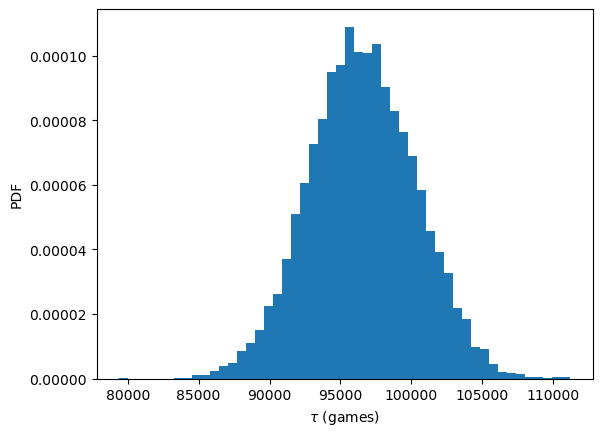

In [22]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
#_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()
